# Project: Wrangling and Analyze Data

In [1]:
# For starters I would import required packages

import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import datetime

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Read the downloaded files and verify if it was imported corrected

twitter_archive_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# I would download the file from the internet and save it in image-predictions.tsv. I would save it as response afterwards

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)


In [4]:
# I would hence create a new file and save the response in it

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
# I would also donwload the data into img_pred_table_df and verify 

img_prediction_table_df = pd.read_csv('image-predictions.tsv', sep='\t')
img_prediction_table_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
tweet_df_list = []

# Read the tweet_json.file into a list of dictionaries

for line in open('tweet_json.txt', 'r', encoding='utf-8'):
    tweet_raw_data = json.loads(line)
    
    tweet_id = tweet_raw_data['id_str']
    retweet_count = tweet_raw_data['retweet_count']
    favorite_count = tweet_raw_data['favorite_count']
    followers_count = tweet_raw_data['user']['followers_count']
    
    tweet_df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count,
                        'followers_count': followers_count})

In [7]:
# We'll subsequently list the dictionaries into a pandas dataframe and view to verify

tweet_df = pd.DataFrame(tweet_df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])
tweet_df.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


###  

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



####   

### PROGRAMMATIC ASSESSMENTS

####  Programmatic assessment: twitter_archive_enhanced dataset

#### I'll view the dataset for twitter_archive_enhanced to give me a fair idea of what I'm looking at to be able to programmatically assess the dataset

In [8]:
# First I'll view the top part of the dataset

twitter_archive_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
# I'll go on to check the tail to give me a total of all columns in scope

twitter_archive_enhanced_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
# I'll go further ahead to view the components of the dataset

twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# I'll follow up with checking for any missing values

twitter_archive_enhanced_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
twitter_archive_enhanced_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None
2054,671390180817915904,NaN,NaN,2015-11-30 18:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Striped dog here. Having fun playing on back. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671390180...,7,10,None,None,None,None,None
953,751830394383790080,NaN,NaN,2016-07-09 17:28:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's very camera shy. 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751830394...,12,10,Tucker,None,None,None,None
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None
2110,670444955656130560,NaN,NaN,2015-11-28 03:31:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paull. He just stubbed his toe. 10/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670444955...,10,10,Paull,None,None,None,None


In [13]:
# I'll conclude with a summary statistic of the dataset

twitter_archive_enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


####   

#### I'll now turn my attention to image_prediction dataset to continue with the programmatic assessment

In [14]:
# Fist I'll view the preceding content of the dataset

img_prediction_table_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
# I'll go on to view the final part to give a broad view of the dataset

img_prediction_table_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
# I'll follow up to find out the nitty-gritties of the dataset

img_prediction_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# I'll go on to look out for missing values

img_prediction_table_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
img_prediction_table_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1637,806542213899489280,https://pbs.twimg.com/media/CzFp3FNW8AAfvV8.jpg,1,vizsla,0.938617,True,Brittany_spaniel,0.036739,True,Chesapeake_Bay_retriever,0.003971,True
861,697242256848379904,https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg,1,grey_fox,0.236031,False,Siamese_cat,0.165791,False,Eskimo_dog,0.063533,True
1124,727286334147182592,https://pbs.twimg.com/media/ChfXDrGUkAEAtF-.jpg,1,bonnet,0.146440,False,sock,0.083091,False,Chihuahua,0.070554,True
457,674781762103414784,https://pbs.twimg.com/media/CV1ObvEWcAA7c6i.jpg,1,ocarina,0.148975,False,hamster,0.068985,False,wool,0.031728,False
2002,876838120628539392,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1,bloodhound,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True


In [19]:
# I'll conclude with a summary statistic of the datatset

img_prediction_table_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


###   

#### Finally I'll do the programmatic assessment for tweet_json dataset

#### I'll go through the same process of viewing the main components of the dataset to give more clarity in the programmatic assessment

In [20]:
# View the head of the dataset

tweet_df.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [21]:
# View base of dataset

tweet_df.tail()

,tweet_id,retweet_count,favorite_count,followers_count
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018
2353,666020888022790149,532,2535,3201018


In [22]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [23]:
# Check for missing values

tweet_df.isnull().sum()

tweet_id           0
retweet_count      0
favorite_count     0
followers_count    0
dtype: int64

In [24]:
tweet_df.sample(5)

,tweet_id,retweet_count,favorite_count,followers_count
198,854120357044912130,8285,33911,3200892
1121,730427201120833536,1176,3809,3200944
376,828011680017821696,2451,11411,3200892
848,765719909049503744,2475,8021,3200906
2289,667165590075940865,1241,2819,3201017


In [25]:
# Summary statistic


tweet_df.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


###   

### VISUAL ASSESSMENTS

#### Visual assessment of twitter_archive_enhanced dataset

In [26]:
# For clarity I'll view the entire twitter_archive_enhanced dataset to give a fair idea of what I'll be asssessing visually 
# This would in turn help gain a bit more information on the shape of the dataset

twitter_archive_enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [27]:
# Tobe able to focus on the dog ratings alone I'll proceed to take out all the retweets in the dataset

df = twitter_archive_enhanced_df[twitter_archive_enhanced_df.retweeted_status_id.isnull()]

In [28]:
# Confirming the removal of all retweets from dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [29]:
df[df['text'].str.match('^RT.*')== True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None


In [30]:
df.drop(df[df['text'].str.match('^RT.*')== True].index, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
# Confirming the removal of all RT's

df[df['text'].str.match('^RT.*')== True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


####     

#### Visual assessment of img_prediction_table

In [32]:
# View the img_prediction_table dataset to appreciate it's contents and a fair view of it's shape

img_prediction_table_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


####   

### Visual assessment of tweet_json dataset

In [33]:
tweet_df

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


###   

#### DUPLICATED COLUMN NAMES

In [34]:
# For a clean outlook of my dataset I'll check for duplicated column names for better enhancement

all_columns = pd.Series(list(twitter_archive_enhanced_df) + list(img_prediction_table_df) + list(tweet_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

###  

### Quality Issues

#### Twitter_archive_enhanced_df

* The timestamp column has an invalid format (i.e string instead of datestamp)
* Some columns for name contain invalid dog name ( e.g 'None', 'a', etc)
* Observation shows source column being an HTML string and not a normal string
* Only want original ratings (no retweets) have images
* Some columns contains retweet hence contains duplicates

#### Img_prediction_table_df

* Some of the test data falls outside what is acceptable (tweet_id)
* The use of underscores instead of spacings in columns p1, p2, p3
* Inconsistent capitalization of breed names (mixture of upper and lower cases in columns p1, p2, p3)
* The contents of columns p1_conf, p2_conf, p3_conf are displayed in terms of proportions rather than percentages

#### Tweet_df

* Datatypes for tweet_id are unacceptable

####        

### TIDINESS ISSUES

#### Twitter_archive_enhanced_df

 - Doggo, puppo, pupper and floofer columns should be in single instead of seperate columns
 - All retweets and columns containing retweets will be removed

#### Img_prediction_table_df

* This table should be included in twitter_archive_enhanced_df table

#### Tweet_df

* Retweet_count, followers_count and favorite_count columns must be rather included in the twitter_archive_enhanced_df table

####    

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [35]:
# Make copies of original pieces of data
twitter_archive_enhanced_df_clean = twitter_archive_enhanced_df.copy()

img_prediction_table_df_clean = img_prediction_table_df.copy() 

tweet_df_clean = tweet_df.copy()

###    

### QUALITY ISSUES

### Issue #1: RESOLVING DISCREPANCIES ON TIMESTAMP COLUMN

#### Define: 

We need to correct the timestamp. A timestamp cannot be a string.

We change it's current status as a string to a datetime to better give clarity.

Hence retweeted_status_timestamp will be dropped

#### Code

In [37]:
twitter_archive_enhanced_df_clean['timestamp'] = twitter_archive_enhanced_df_clean['timestamp'].str.slice(start=0, stop=-6)

In [38]:
twitter_archive_enhanced_df_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_df_clean['timestamp'], format= "%Y-%m-%d %H:%M:%S")

#### Test

In [39]:
twitter_archive_enhanced_df_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [40]:
twitter_archive_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

####    

### ISSUE #2: INVALID DOG NAMES RECTIFICATION

### Define

Substituting invalid names with 'None' for the name column

#### Code

In [41]:
twitter_archive_enhanced_df_clean['name'] = twitter_archive_enhanced_df_clean['name'].str.replace('^[a-z]+', 'None')

#### Test

In [42]:
twitter_archive_enhanced_df_clean['name'].value_counts()

None        854
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
Daisy         7
Buddy         7
Toby          7
Bailey        7
Bella         6
Jack          6
Stanley       6
Milo          6
Leo           6
Oscar         6
Jax           6
Scout         6
Rusty         6
Dave          6
Koda          6
Larry         5
Chester       5
Bentley       5
Finn          5
           ... 
Nigel         1
Dylan         1
Pluto         1
Tripp         1
Chuq          1
Timmy         1
Nimbus        1
Gunner        1
Bradlay       1
Kobe          1
Newt          1
Mack          1
Ronduh        1
Loomis        1
Claude        1
Monkey        1
Crimson       1
Nugget        1
Eugene        1
Karma         1
Sully         1
Marvin        1
Luther        1
Dotsy         1
Molly         1
Hermione      1
Bayley        1
Andy          1
Jordy         1
Devón         1
Name: name, Length: 932,

In [43]:
# Verify to see if repalcement has been done with a selected sample

twitter_archive_enhanced_df_clean['name'].sample(10)

2182    Harrison
1711       Percy
200         None
892       Oakley
1475    Freddery
1048        Kilo
1478        Phil
2012      Ridley
454          Tom
1764     Crystal
Name: name, dtype: object

####     

### ISSUE #3: LAPSES IN IDENTITY INFORMATION

### Define

From observation I observed there were lapses in some columns

These are namely 'in_reply_to_status','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'.

I'll be dropping these columns for a more clean data

#### Code

In [44]:
twitter_archive_enhanced_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis =1, inplace=True)

#### Test

In [45]:
twitter_archive_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


### ISSUE #4: GETTING TWEET SOURCE FROM HTML

#### Define 

I'll will work on extracting the source from HTML

#### Code 

In [46]:
twitter_archive_enhanced_df_clean['source'] = twitter_archive_enhanced_df_clean['source'].str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [47]:
twitter_archive_enhanced_df_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### ISSUE #5 UNACCEPTABLE DATASET 

#### Define

I realized there is a tweet_id column under twitter_archive_enhanced_df_clean table which ideally should be a string and not an integer

This step would convert the tweet_id from integers to string

#### Code

In [48]:
twitter_archive_enhanced_df_clean['tweet_id'] = twitter_archive_enhanced_df_clean['tweet_id'].astype(str)
twitter_archive_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


### Issue #6: Elimination of underscores and substituting them with space

#### Define

Columns p1,p2,p3 have underscores as their seperators. I'll replace these with spaces for a better outlook of these columns

Underscores in columns p1,p2 and p3 will be replaced with space respectively

In [49]:
# Underscores in columns p1,p2 and p3 will be replaced with space respectively
img_prediction_table_df_clean['p1'] = img_prediction_table_df_clean['p1'].str.replace('_',' ')
img_prediction_table_df_clean['p2'] = img_prediction_table_df_clean['p2'].str.replace('_',' ')
img_prediction_table_df_clean['p3'] = img_prediction_table_df_clean['p3'].str.replace('_',' ')

### Test

In [50]:
img_prediction_table_df_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


### Issue #7: Inconsistent Capitalization

#### Define

For consistency I'll make all letters that begins a breed name capital

#### Code

In [51]:
img_prediction_table_df_clean['p1'] = img_prediction_table_df_clean['p1'].str.title()
img_prediction_table_df_clean['p2'] = img_prediction_table_df_clean['p2'].str.title()
img_prediction_table_df_clean['p3'] = img_prediction_table_df_clean['p3'].str.title()

#### Test

In [52]:
# Check for validation

img_prediction_table_df_clean[['p1','p2','p3']].sample(10)

,p1,p2,p3
92,Toy Poodle,Miniature Poodle,Teddy
1796,Old English Sheepdog,Tibetan Terrier,Guinea Pig
478,Pembroke,Cardigan,Chow
518,Golden Retriever,Borzoi,Dingo
349,West Highland White Terrier,Borzoi,Great Pyrenees
1161,Golden Retriever,Chow,Labrador Retriever
434,Seashore,American Alligator,Sandbar
1204,Labrador Retriever,Flat-Coated Retriever,Chesapeake Bay Retriever
1877,Golden Retriever,Labrador Retriever,Tibetan Mastiff
660,Wombat,Koala,Beaver


### Issue #8 Proportions instead of percentages 

#### Define

Convert all proportions in p1_conf, p2_conf and p3_conf to percentages for easier understanding and appreciation

#### Code

In [53]:
img_prediction_table_df_clean['p1_conf'] = img_prediction_table_df_clean['p1_conf'].apply(lambda x: round(x*100, 2))
img_prediction_table_df_clean['p2_conf'] = img_prediction_table_df_clean['p1_conf'].apply(lambda x: round(x*100, 2))
img_prediction_table_df_clean['p3_conf'] = img_prediction_table_df_clean['p1_conf'].apply(lambda x: round(x*100, 2))

#### Test

In [54]:
img_prediction_table_df_clean[['p1_conf','p2_conf', 'p3_conf']].sample(5)

,p1_conf,p2_conf,p3_conf
1765,62.81,6281.0,6281.0
401,38.22,3822.0,3822.0
1260,54.85,5485.0,5485.0
339,71.89,7189.0,7189.0
2048,79.35,7935.0,7935.0


In [55]:
img_prediction_table_df_clean[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2075.000000
mean,59.454954,5945.495422,5945.495422
std,27.117357,2711.735651,2711.735651
min,4.430000,443.000000,443.000000
25%,36.440000,3644.000000,3644.000000
50%,58.820000,5882.000000,5882.000000
75%,84.385000,8438.500000,8438.500000
max,100.000000,10000.000000,10000.000000


### Issue #9: Unacceptable datatypes

#### Define 

Convert tweet_id from integer to string

### Test 

In [56]:
twitter_archive_enhanced_df_clean['tweet_id'] = twitter_archive_enhanced_df_clean['tweet_id'].astype(str)
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


### Issue #10: Duplicates due to retweets

#### Define

To avoid duplicates I will maintain only rows that are original tweets and not retweets.

#### Code 

In [57]:
twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Code

In [58]:
twitter_archive_enhanced_df_clean = twitter_archive_enhanced_df.copy()

In [59]:
twitter_archive_enhanced_df_clean = twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean.retweeted_status_id.isnull()]

#### Test

In [60]:
len(twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean.retweeted_status_id.isnull() == False])

0

### TIDINESS ISSUES

### Issue 1: Realigning dognames in single column

#### Define

Rows containing multiple dog names like doggopupper, doggopupper, doggofloofer needs to be seperated and drop original columns from dataset

#### Code

In [61]:
# Early on I replaced some unspecified dog names with 'None'
# In this section I'll further replace the 'None' with np.Nan to further assert it not being a number

def replace_none(feature): 
    for feature_type in range(0, len(feature)):
        # Replace all the None with np.NaN
        twitter_archive_enhanced_df_clean[feature[feature_type]].replace('None', '', inplace=True)
        twitter_archive_enhanced_df_clean[feature[feature_type]].replace(np.NaN, '', inplace=True)    

In [62]:
dog_feature_list = ['doggo', 'floofer', 'pupper', 'puppo']
replace_none(dog_feature_list)

In [63]:
# I subsequently add all the dog features strings to form one column

twitter_archive_enhanced_df_clean['dog_feature'] = twitter_archive_enhanced_df_clean['doggo'] + twitter_archive_enhanced_df_clean['floofer'] + twitter_archive_enhanced_df_clean['pupper'] + twitter_archive_enhanced_df_clean['puppo']

In [64]:
# Empty strings will be replaced with None

twitter_archive_enhanced_df_clean['dog_feature'].replace('', 'None', inplace=True)

In [65]:
twitter_archive_enhanced_df_clean['dog_feature'].value_counts()

None            1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_feature, dtype: int64

In [66]:
# I'll proceed to drop multiple dog_features values will be seperated and dropped

twitter_archive_enhanced_df_clean['dog_feature'] = twitter_archive_enhanced_df_clean['dog_feature'].str.replace('doggopuppo', 'doggo,puppo')
twitter_archive_enhanced_df_clean['dog_feature'] = twitter_archive_enhanced_df_clean['dog_feature'].str.replace('doggofloofer', 'doggo,floofer')
twitter_archive_enhanced_df_clean['dog_feature'] = twitter_archive_enhanced_df_clean['dog_feature'].str.replace('doggopupper', 'doggo,pupper')

In [67]:
# Proceeding to drop them

twitter_archive_enhanced_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [68]:
# Validating to be sure of no duplicates

twitter_archive_enhanced_df_clean.duplicated().sum()

0

#### Test

In [69]:
# Double checking to confirm columns being dropped are actauuly dropped

assert twitter_archive_enhanced_df_clean.columns.all() not in dog_feature_list

In [70]:
# Validating total dog count

twitter_archive_enhanced_df_clean['dog_feature'].value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_feature, dtype: int64

In [71]:
# Confirming the absence of duplicates

twitter_archive_enhanced_df_clean.duplicated().sum()

0

### Issue #2: Presenting twitter_df_clean and twitter_archive_enhanced_df_clean as one table

#### Define

We would merge these two tables (twitter_df_clean and twitter_archive_enhanced_df) as one

In [72]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


#### Code

In [76]:
twitter_archive_enhanced_df_clean = pd.merge(twitter_archive_enhanced_df_clean, tweet_df_clean, on='tweet_id', how='left')

#### Test

In [77]:
# I'll hence verify to be sure

twitter_archive_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_feature                   2175 non-null object
retweet_count                 2175 non-null int64
favorite_count                2175 non-null int64
followers_count               2175 non-null int64
dtypes: float64(4), int64(5), object(8)


In [78]:
twitter_archive_enhanced_df_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_feature,retweet_count,favorite_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467,3200889
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819,3200889
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,25461,3200889
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,42908,3200889
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,41048,3200889
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,3261,20562,3200889
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,2158,12041,3200889
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,16716,56848,3200889
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,4429,28226,3200889
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467,3200889


### Issue #3: Consolidate img_prediction_table_df_clean and twitter_archive_enhanced_df_clean tables

#### Define

We'll basically be merging these tables(img_prediction_table_df_clean and twitter_archive_enhanced_df_clean) as one

#### Code

In [79]:
#Currently as an integer I'll convert tweet_id as a string and merge 

img_prediction_table_df_clean['tweet_id'] = img_prediction_table_df_clean['tweet_id'].astype(str)
twitter_archive_enhanced_df_clean = pd.merge(twitter_archive_enhanced_df_clean, img_prediction_table_df_clean, on='tweet_id', how='left')

In [80]:
#Ill check to validate changes

twitter_archive_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 28 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_feature                   2175 non-null object
retweet_count                 2175 non-null int64
favorite_count                2175 non-null int64
followers_count               2175 non-null int64
jpg_url                       1994 non-n

In [81]:
twitter_archive_enhanced_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,Orange,9.70,False,Bagel,970.0,False,Banana,970.0,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,32.36,True,Pekinese,3236.0,True,Papillon,3236.0,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,71.60,True,Malamute,7160.0,True,Kelpie,7160.0,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,Paper Towel,17.03,False,Labrador Retriever,1703.0,True,Spatula,1703.0,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,Basset,55.57,True,English Springer,5557.0,True,German Short-Haired Pointer,5557.0,True


In [82]:
twitter_archive_enhanced_df_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2170,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1.0,Miniature Pinscher,56.03,True,Rottweiler,5603.0,True,Doberman,5603.0,True
2171,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1.0,Rhodesian Ridgeback,40.81,True,Redbone,4081.0,True,Miniature Pinscher,4081.0,True
2172,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1.0,German Shepherd,59.65,True,Malinois,5965.0,True,Bloodhound,5965.0,True
2173,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1.0,Redbone,50.68,True,Miniature Pinscher,5068.0,True,Rhodesian Ridgeback,5068.0,True
2174,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,1.0,Welsh Springer Spaniel,46.51,True,Collie,4651.0,True,Shetland Sheepdog,4651.0,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [83]:
twitter_archive_enhanced_df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [84]:
twitter_project = pd.read_csv('twitter_archive_master.csv')

In [85]:
twitter_project[twitter_project.text.str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [86]:
twitter_project[twitter_project.text.str.startswith('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [87]:
twitter_project.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,Orange,9.70,False,Bagel,970.0,False,Banana,970.0,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,32.36,True,Pekinese,3236.0,True,Papillon,3236.0,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,71.60,True,Malamute,7160.0,True,Kelpie,7160.0,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,Paper Towel,17.03,False,Labrador Retriever,1703.0,True,Spatula,1703.0,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,Basset,55.57,True,English Springer,5557.0,True,German Short-Haired Pointer,5557.0,True


In [88]:
twitter_project.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2170,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1.0,Miniature Pinscher,56.03,True,Rottweiler,5603.0,True,Doberman,5603.0,True
2171,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1.0,Rhodesian Ridgeback,40.81,True,Redbone,4081.0,True,Miniature Pinscher,4081.0,True
2172,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1.0,German Shepherd,59.65,True,Malinois,5965.0,True,Bloodhound,5965.0,True
2173,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1.0,Redbone,50.68,True,Miniature Pinscher,5068.0,True,Rhodesian Ridgeback,5068.0,True
2174,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,1.0,Welsh Springer Spaniel,46.51,True,Collie,4651.0,True,Shetland Sheepdog,4651.0,True


In [89]:
twitter_project.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,img_num,p1_conf,p2_conf,p3_conf
count,2.175000e+03,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2175.000000,2175.000000,2175.000000,2175.000000,2.175000e+03,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,13.215172,10.492874,2757.987126,8746.022989,3.200945e+06,1.203109,59.394228,5939.422768,5939.422768
std,6.748668e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,47.725696,7.019084,4646.599662,12052.503836,4.417845e+01,0.560777,27.195399,2719.539910,2719.539910
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.000000,52.000000,3.200799e+06,1.000000,4.430000,443.000000,443.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,10.000000,10.000000,608.000000,1911.500000,3.200901e+06,1.000000,36.282500,3628.250000,3628.250000
50%,7.098528e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,11.000000,10.000000,1341.000000,4042.000000,3.200947e+06,1.000000,58.765000,5876.500000,5876.500000
75%,7.894226e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,12.000000,10.000000,3220.000000,11107.000000,3.201001e+06,1.000000,84.627500,8462.750000,8462.750000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,NaN,1776.000000,170.000000,79515.000000,132810.000000,3.201018e+06,4.000000,100.000000,10000.000000,10000.000000


In [90]:
twitter_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 28 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_feature                   2175 non-null object
retweet_count                 2175 non-null int64
favorite_count                2175 non-null int64
followers_count               2175 non-null int64
jpg_url                       1994 non-n

In [91]:
twitter_project.duplicated().sum()

0

### Insights:
1. I seek to find the most popular dog name among tweeters.

2. I seek to analyse the most used twitter source among the three sources.

3. I seek to analyse the trend analysis of tweets for the period January 2016 to August 2017

### Visualization

### Most popular dog names among tweeters

In [92]:
twitter_project = twitter_project[twitter_project['name'] != 'None'] 

In [93]:
top_10 = twitter_project['name'].value_counts().nlargest(10)

In [94]:
top_10

a          55
Lucy       11
Charlie    11
Cooper     10
Oliver     10
Penny       9
Tucker      9
Winston     8
Lola        8
Sadie       8
Name: name, dtype: int64

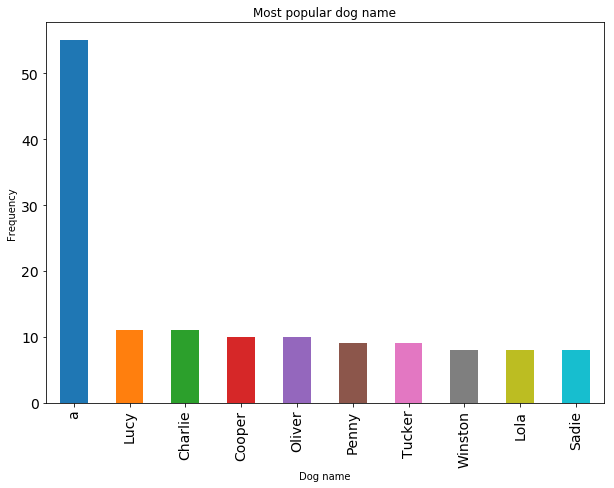

In [95]:
# Creating the plot
barplot = top_10.plot.bar(fontsize=14)

#Setting the figure size
barplot.figure.set_size_inches(10,7)

#Adding semantic labels
plt.title('Most popular dog name')
plt.xlabel('Dog name')
plt.ylabel('Frequency')

#Saving the plot
plt.savefig('Most_popular_dog_name.jpg')


In [96]:
# From the graph it can be observed that Charlie was the most dog name that was tweeted
#It follows through with Lucy, Cooper down to Sadie being the least tweeted name.

### Most used twitter source

In [97]:
source=twitter_project['source'].value_counts()

In [98]:
source

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1420
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          45
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       20
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

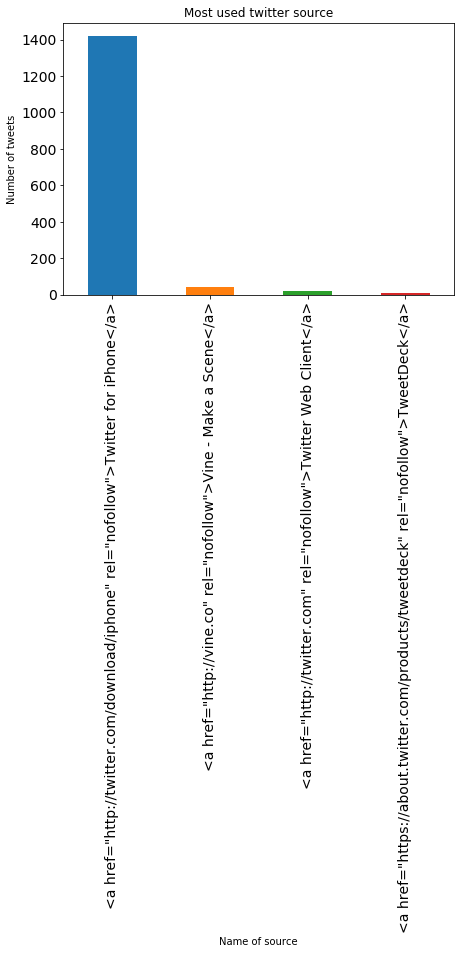

In [99]:
# Creating the plot
barplot2 = source.plot.bar(fontsize=14)

#Setting the figure size
barplot2.figure.set_size_inches(7,5)

#Adding semantic labels
plt.title('Most used twitter source')
plt.xlabel('Name of source')
plt.ylabel('Number of tweets')

#Saving the plot
plt.savefig('Most_used_twitter_source.jpg')


In [100]:
# From the graph the source of most tweets came from Twitter for iPhone. This had the most tweets of about 1436 emanating from there.
# The least source of tweets was the TweetDeck as shown from the graph with just 9 tweets

### Tweet trends between January 2016 and August 2017

In [101]:
# Converting timestamp to datetime and validating

twitter_project['timestamp'] = pd.to_datetime(twitter_project['timestamp'], format='%Y-%m-%d %H:%M:%S')


tweets_per_month = twitter_project.groupby(pd.Grouper(key='timestamp', freq='M')).count().reset_index()


tweets_per_month = tweets_per_month[['tweet_id','timestamp']]


tweets_per_month.head()

,tweet_id,timestamp
0,197,2015-11-30
1,241,2015-12-31
2,116,2016-01-31
3,84,2016-02-29
4,93,2016-03-31


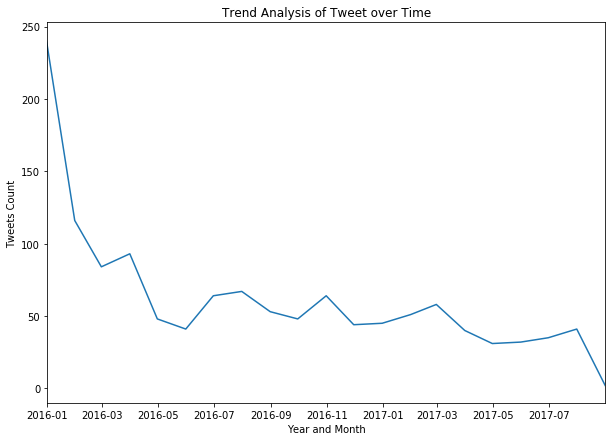

In [102]:
# Ploting the trend of tweets over a random period to observe it's trend

plt.figure(figsize=[10,7])


plt.xlim([datetime.date(2016, 1, 1), datetime.date(2017, 8, 31)])

# Ploting Timestamp against Tweet_id
plt.plot(tweets_per_month['timestamp'], tweets_per_month['tweet_id']);

# x axis label
plt.xlabel('Year and Month')

# y axis label
plt.ylabel('Tweets Count')

# Plot Title
plt.title('Trend Analysis of Tweet over Time')

# Save the plot
plt.savefig('trend_plot.jpg')

In [103]:
# Tweets were on a decline between January 2016 but increased in March 2016 but further dropped. A tipsy-turvy trend was observed with a decline towards July 2017

In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0